In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("data/wage1.raw", delim_whitespace=True, header=None)
wage = df[0]

In [7]:
y = wage
s = np.shape(wage)
const = np.ones(s)
educ = df[1]
exper = df[2]
tenure = df[3]
X = np.column_stack((const, educ, exper, tenure))

In [8]:
beta = np.linalg.inv(X.T @ X)@X.T@y

In [9]:
u = y-X@beta
n, k = np.shape(X)
sig2 = u.T@u/(n-k)
Var = sig2*np.linalg.inv(X.T @ X)
std = np.sqrt(np.diag(Var))

(515,)
(526,)


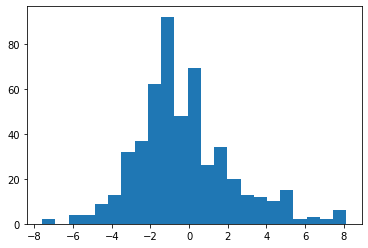

In [10]:
#------------------------------#
#--- EXERCISE 4 ---------------# 
#------------------------------# 

s = (np.abs(u) < 3*np.sqrt(sig2))
u1 = u[s]
plt.hist(u1, "auto")
y = y[s]
X = X[s,:]
beta = np.linalg.inv(X.T @ X)@X.T@y

print(u1.shape)
print(u.shape)


In [11]:
#------------------------------#
#--- EXERCISE 5 ---------------# 
#------------------------------# 
from scipy.stats import t

u = y-X@beta
n, k = np.shape(X)
sig2 = u.T@u/(n-k)
Var = sig2*np.linalg.inv(X.T @X)
std = np.sqrt(np.diag(Var))

print(beta[2]/std[2])
print(t.sf(beta[2]/std[2], n-k)*2)
print(t.ppf(0.95, n-k))

1.7788778955907623
0.07585416697772952
1.647841008903657


In [ ]:
#------------------------------#
#--- EXERCISE 6 ---------------# 
#------------------------------# 
import statsmodels.api as sm

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

In [52]:
#------------------------------#
#--- EXERCISE 7 ---------------# 
#------------------------------#

y = np.log(y)
beta = np.linalg.inv(X.T @ X) @ X.T @ y
u = y - X@beta
n, k = np.shape(X)
sig2 = u.T@u/(n-k)
Var = sig2*np.linalg.inv(X.T @ X)
std = np.sqrt(np.diag(Var))

print(beta[2]/std[2])
print(t.sf(beta[2]/std[2], n-k)*2)

[[nan nan nan nan]
 [nan nan nan nan]
 [nan nan inf nan]
 [nan nan nan nan]]
[nan nan nan nan]
[nan nan nan nan]
